# Import Library

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
import plotly.express as px

sns.set_style("darkgrid")

# Data Preprocessing

In [158]:
df = pd.read_csv('../datasets/weather_cleaned.csv')
df.head()

province  max  min  wind wind_d  rain  humidi  cloud  pressure        date   
0  Bac Lieu   27   22    17    NNE   6.9      90     71      1010  2009-01-01  \
1  Bac Lieu   31   25    20    ENE   0.0      64     24      1010  2010-01-01   
2  Bac Lieu   29   24    14      E   0.0      75     45      1008  2011-01-01   
3  Bac Lieu   30   24    30      E   0.0      79     52      1012  2012-01-01   
4  Bac Lieu   31   25    20    ENE   0.0      70     24      1010  2013-01-01   

   ... min_bin   wind_bin  rain_bin humidi_bin  cloud_bin pressure_bin region   
0  ...   matme        nhe       vua        cao   nhieumay    trungbinh     mn  \
1  ...    amap        nhe  khongmua  trungbinh  trongxanh    trungbinh     mn   
2  ...   matme        nhe  khongmua        cao      comay    trungbinh     mn   
3  ...   matme  trungbinh  khongmua        cao      comay    trungbinh     mn   
4  ...    amap        nhe  khongmua  trungbinh  trongxanh    trungbinh     mn   

   year  month  day  
0  2009      1    1  
1  2010      1    1  
2  2011      1    1  
3  2012      1    1  
4  2013      1    1  

[5 rows x 21 columns]

In [159]:
df['date'] = df['date'].astype('datetime64[ns]')

In [160]:
df = df[df['province'] != 'Hanoi']

In [161]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [162]:
readable_mapper = {
    'giaret': 'Giá rét',
    'lanh': 'Lạnh',
    'matme': 'Mát mẻ',
    'amap': 'Ấm áp',
    'nong': 'Nóng',
    'oia': 'Oi ả',
    'emdem': 'Êm đềm',
    'nhe': 'Nhẹ',
    'trungbinh': 'Trung bình',
    'manh': 'Mạnh',
    'khongmua': 'Không mưa',
    'nho': 'Nhỏ',
    'vua': 'Vừa',
    'to': 'To',
    'ratto': 'Rất to',
    'thap': 'Thấp',
    'cao': 'Cao',
    'ratcao': 'Rất cao',
    'trongxanh': 'Trong xanh',
    'comay': 'Có mây',
    'nhieumay': 'Nhiều mây',
    'baophu': 'Mây bao phủ',
    'mb': 'Miền Bắc',
    'dhntb': 'Duyên hải Nam Trung Bộ',
    'tn': 'Tây Nguyên',
    'mn': 'Miền Nam'
}

In [163]:
temp_order = ['giaret', 'lanh', 'matme', 'amap', 'nong', 'oia']
wind_order = ['emdem', 'nhe', 'trungbinh', 'manh']
rain_order = ['khongmua', 'nho', 'vua', 'to', 'ratto']
cloud_order = ['trongxanh', 'comay', 'nhieumay', 'baophu']
humidi_order = ['thap', 'trungbinh', 'cao', 'ratcao']
pressure_order = ['thap', 'trungbinh', 'cao']

# Data Exploring

## Giữa cột thời gian với các cột numerical

Ở đây nhóm chủ yếu phân tích mối quan hệ giữa cột `year` và `month` với các cột numerical

In [164]:
def stacking(df, by, value):
    data = df.groupby(by = by)[value].agg('value_counts').unstack(-1).fillna(0)
    data = data.div(data.sum(axis = 1), axis = 0) * 100
    
    return data

### `min` và `max` (nhiệt độ cao nhất và thấp nhất trong ngày)

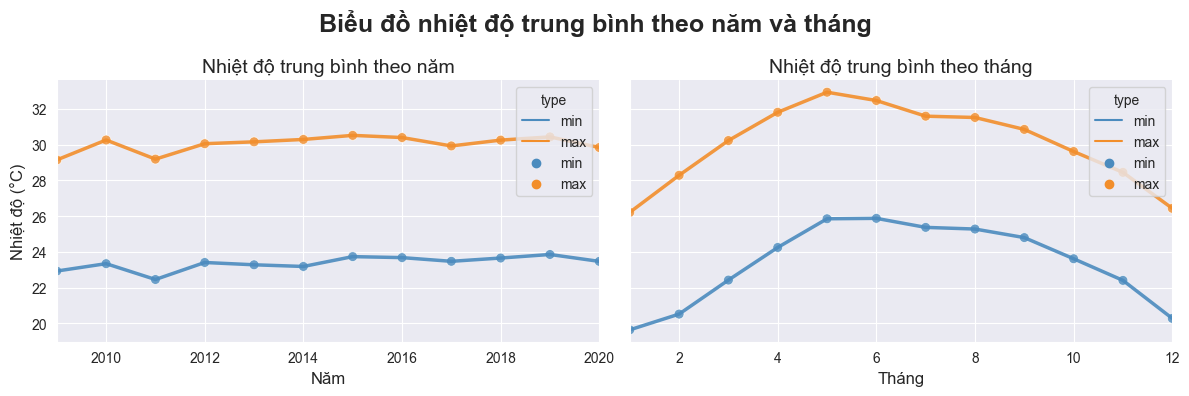

In [165]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey='row')
fig.subplots_adjust(wspace=0.05)

data = df.groupby(by=['year'])[['min', 'max']].mean().stack().reset_index()
data.columns = ['year', 'type', 'temp']

sns.lineplot(
    data=data, x='year', y='temp', hue='type', ax=axes[0],
    palette={'min': '#4B8BBE', 'max': '#F28E2B'}, linewidth=2.5, alpha=0.9,
)
sns.scatterplot(
    data=data, x='year', y='temp', hue='type', ax=axes[0],
    palette={'min': '#4B8BBE', 'max': '#F28E2B'}, s=50, alpha=0.8,
)

data = df.groupby(by=['month'])[['min', 'max']].mean().stack().reset_index()
data.columns = ['month', 'type', 'temp']

sns.lineplot(
    data=data, x='month', y='temp', hue='type', ax=axes[1],
    palette={'min': '#4B8BBE', 'max': '#F28E2B'}, linewidth=2.5, alpha=0.9,
)
sns.scatterplot(
    data=data, x='month', y='temp', hue='type', ax=axes[1],
    palette={'min': '#4B8BBE', 'max': '#F28E2B'}, s=50, alpha=0.8,
)

axes[0].set_title('Nhiệt độ trung bình theo năm', fontsize=14)
axes[1].set_title('Nhiệt độ trung bình theo tháng', fontsize=14)
fig.suptitle('Biểu đồ nhiệt độ trung bình theo năm và tháng', fontsize=18, fontweight='bold')

axes[0].set_xlabel('Năm', fontsize=12)
axes[1].set_xlabel('Tháng', fontsize=12)

axes[0].set_ylabel('Nhiệt độ (°C)', fontsize=12)

axes[0].set_title('Nhiệt độ trung bình theo năm', fontsize=14)
axes[1].set_title('Nhiệt độ trung bình theo tháng', fontsize=14)

axes[0].tick_params(axis='both', which='major', labelsize=10)
axes[1].tick_params(axis='both', which='major', labelsize=10)

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

axes[0].set_xlim(df['year'].min(), df['year'].max())
axes[1].set_xlim(df['month'].min(), df['month'].max())

fig.tight_layout()


- Nhiệt độ trung bình qua các năm nhiều chung có sự biến động nhẹ, tăng giảm trong khoảng ±1°C giữa các năm
- Nhiệt độ trung bình các tháng trong năm:
    - Cao nhất trong vào khoảng tháng 4, 5, 6, 7
    - Giảm dần về các tháng 8, 9 và thấp nhất vào tháng 12, tháng 1

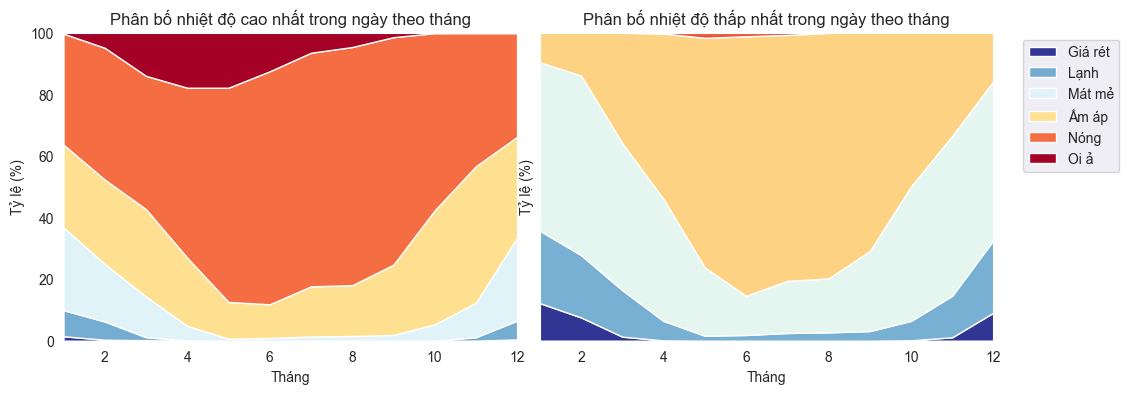

In [166]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey='row')
fig.subplots_adjust(wspace=0.05)

theme = plt.get_cmap('RdYlBu_r')
axes[0].set_prop_cycle('color', theme(np.linspace(0, 1, 6)).tolist())
axes[1].set_prop_cycle('color', theme(np.linspace(0, 5/6, 5)).tolist())

data = stacking(df, 'month', 'max_bin')
axes[0].stackplot(data.index, data.iloc[:, [1, 2, 3, 0, 4, 5]].values.transpose(), linewidth=1)

data = stacking(df, 'month', 'min_bin')
axes[1].stackplot(data.index, data.iloc[:, [1, 2, 3, 0, 4]].values.transpose(), linewidth=1)

axes[0].legend([readable_mapper[i] for i in temp_order], loc='upper left', bbox_to_anchor=(2.1, 1))

axes[0].set_title('Phân bố nhiệt độ cao nhất trong ngày theo tháng')
axes[1].set_title('Phân bố nhiệt độ thấp nhất trong ngày theo tháng')

axes[0].set_xlim(1, 12)
axes[1].set_xlim(1, 12)
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)

axes[0].set_xlabel('Tháng')
axes[1].set_xlabel('Tháng')

axes[0].set_ylabel('Tỷ lệ (%)')
axes[1].set_ylabel('Tỷ lệ (%)')


plt.show()


In [167]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# fig.subplots_adjust(wspace = 0.15)
# fig.subplots_adjust(hspace = 0.35)

# # First plot
# data = df.groupby(by=['year'])[['min', 'max']].mean().stack().reset_index()
# data.columns = ['year', 'type', 'temp']
# sns.lineplot(
#     data=data, x='year', y='temp', hue='type', ax=axes[0][0],
#     palette={'min': '#4B8BBE', 'max': '#F28E2B'}, linewidth=2.5, alpha=0.9,
# )
# sns.scatterplot(
#     data=data, x='year', y='temp', hue='type', ax=axes[0][0],
#     palette={'min': '#4B8BBE', 'max': '#F28E2B'}, s=50, alpha=0.8,
# )
# axes[0][0].set_xlabel('Năm', fontsize=12)
# axes[0][0].set_ylabel('Nhiệt độ (°C)', fontsize=12)
# axes[0][0].set_title('Nhiệt độ trung bình theo năm', fontsize=14)
# axes[0][0].tick_params(axis='both', which='major', labelsize=10)
# axes[0][0].spines['right'].set_visible(False)
# axes[0][0].spines['top'].set_visible(False)
# axes[0][0].set_xlim(df['year'].min(), df['year'].max())

# # Second plot
# data = df.groupby(by=['month'])[['min', 'max']].mean().stack().reset_index()
# data.columns = ['month', 'type', 'temp']
# sns.lineplot(
#     data=data, x='month', y='temp', hue='type', ax=axes[0][1],
#     palette={'min': '#4B8BBE', 'max': '#F28E2B'}, linewidth=2.5, alpha=0.9,
# )
# sns.scatterplot(
#     data=data, x='month', y='temp', hue='type', ax=axes[0][1],
#     palette={'min': '#4B8BBE', 'max': '#F28E2B'}, s=50, alpha=0.8,
# )
# axes[0][1].set_xlabel('Tháng', fontsize=12)
# axes[0][1].set_ylabel('')
# axes[0][1].set_title('Nhiệt độ trung bình theo tháng', fontsize=14)
# axes[0][1].tick_params(axis='both', which='major', labelsize=10)
# axes[0][1].spines['right'].set_visible(False)
# axes[0][1].spines['top'].set_visible(False)
# axes[0][1].set_xlim(df['month'].min(), df['month'].max())

# # Third plot
# theme = plt.get_cmap('RdYlBu_r')
# axes[1][0].set_prop_cycle('color', theme(np.linspace(0, 1, 6)).tolist())
# data = stacking(df, 'month', 'max_bin')
# axes[1][0].stackplot(data.index, data.iloc[:, [1, 2, 3, 0, 4, 5]].values.transpose(), linewidth=1)
# axes[1][0].set_title('Phân bố nhiệt độ cao nhất trong ngày theo tháng')
# axes[1][0].set_xlabel('Tháng', fontsize=12)
# axes[1][0].set_ylabel('Tỷ lệ (%)', fontsize=12)
# axes[1][0].set_xlabel('Tháng', fontsize=12)
# axes[1][1].set_xlabel('Tháng', fontsize=12)
# axes[1][0].legend([readable_mapper[i] for i in temp_order], loc='best')

# # Forth plot
# theme = plt.get_cmap('RdYlBu_r')
# axes[1][1].set_prop_cycle('color', theme(np.linspace(0, 5/6, 5)).tolist())
# data = stacking(df, 'month', 'min_bin')
# axes[1][1].stackplot(data.index, data.iloc[:, [1, 2, 3, 0, 4]].values.transpose(), linewidth=1)
# axes[1][1].set_title('Phân bố nhiệt độ thấp nhất trong ngày theo tháng')
# axes[1][1].set_xlabel('Tháng', fontsize=12)
# axes[1][1].set_ylabel('Tỷ lệ (%)', fontsize=12)
# axes[1][1].set_xlabel('Tháng', fontsize=12)
# axes[1][1].set_xlabel('Tháng', fontsize=12)
# axes[1][1].legend([readable_mapper[i] for i in temp_order], loc='best')

# plt.show()


### `rain` (lượng mưa)

Text(0.5, 0.98, 'Phân tích lượng mưa')

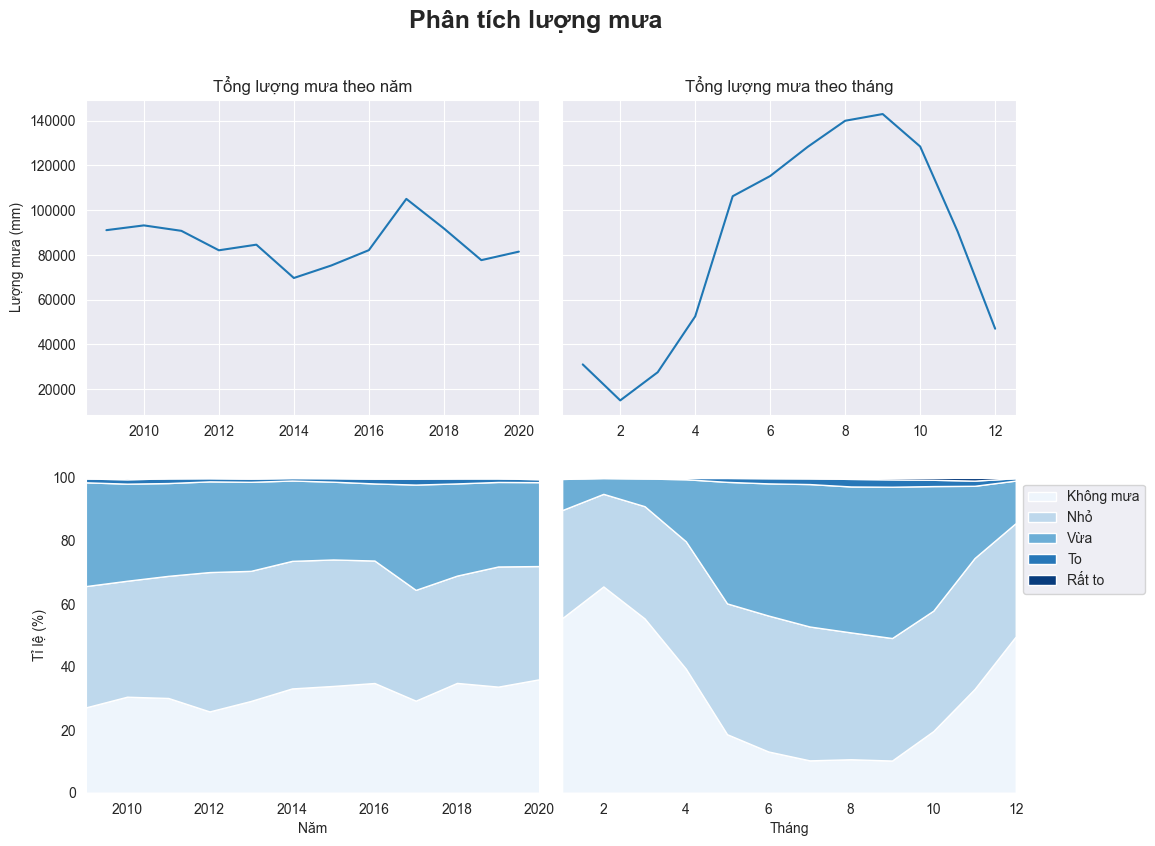

In [168]:
fig, axes = plt.subplots(2, 2, figsize = (12, 9), sharey = 'row')
fig.subplots_adjust(wspace = 0.05)

data = df.groupby(by = ['year'])[['rain']].sum().reset_index()
data.columns = ['year', 'rain']

sns.lineplot(
    data = data, x = 'year', y = 'rain', ax = axes[0, 0],
)

data = df.groupby(by = ['month'])[['rain']].sum().reset_index()
data.columns = ['month', 'rain']

sns.lineplot(
    data = data, x = 'month', y = 'rain', ax = axes[0, 1],
)

theme = plt.get_cmap('Blues')
axes[1, 0].set_prop_cycle('color', theme(np.linspace(0.05, 0.95, 5)).tolist())
axes[1, 1].set_prop_cycle('color', theme(np.linspace(0.05, 0.95, 5)).tolist())

data = stacking(df, 'year', 'rain_bin')
axes[1, 0].stackplot(data.index, data.iloc[:, [0, 1, 4, 3, 2]].values.transpose())

data = stacking(df, 'month', 'rain_bin')
axes[1, 1].stackplot(data.index, data.iloc[:, [0, 1, 4, 3, 2]].values.transpose())
axes[1, 1].legend([readable_mapper[i] for i in rain_order], loc = 'upper left', bbox_to_anchor = (1, 1))

axes[0, 0].set_title('Tổng lượng mưa theo năm')
axes[0, 1].set_title('Tổng lượng mưa theo tháng')

axes[0, 0].set_ylabel('Lượng mưa (mm)')
axes[1, 0].set_ylabel('Tỉ lệ (%)')

axes[0, 0].set_xlabel('')
axes[0, 1].set_xlabel('')
axes[1, 0].set_xlabel('Năm')
axes[1, 1].set_xlabel('Tháng')

axes[1, 0].set_xlim(2009, 2020)
axes[1, 1].set_xlim(1, 12)
axes[1, 0].set_ylim(0, 100)
axes[1, 1].set_ylim(0, 100)

fig.suptitle('Phân tích lượng mưa', fontsize=18, fontweight='bold')

* Lượng mưa trung bình nằm có sự biến động nhẹ giai đoạn 2009 - 2014, nhìn chung có xu hướng giảm, sau đó có sự biến động mạnh hơn vào giai đoạn 2015 - 2020. Nhìn vào biểu đồ miền ta cũng có thể thấy lượng mưa trung bình năm 2017 cao vượt hơn những năm khác là do tỉ lệ mưa vừa và mưa to ở năm này tăng mạnh hơn.
* Lượng mưa trung bình theo tháng thấp nhất vào khoảng tháng 1, 2, do tần suất ngày không mưa và mưa nhỏ chiếm đa số. Sau đó lượng mưa tăng dần và đạt đỉnh vào tháng 8, 9, 10 khi những ngày mưa vừa, to thậm chí rất to xuất hiện. Lượng mưa giảm dần về các tháng 11, 12

In [169]:
# Tạo biểu đồ đồ thị chồng cho tỉ lệ mưa theo năm và tháng (stacked area chart)
fig_stack = px.area(df, x='year', y='rain', color='rain_bin', line_group='rain_bin',
                    category_orders={'rain_bin': readable_mapper.values()},
                    title='Tỉ lệ mưa theo năm và tháng')
fig_stack.update_layout(xaxis_title='Năm', yaxis_title='Tỉ lệ (%)',
                        legend_title='Lượng mưa', legend=dict(x=1, y=1))

fig_stack.show()


Thông qua biểu đồ, ta có thể quan sát được xu hướng tỉ lệ mưa theo từng năm và tháng. Biểu đồ cho thấy rằng thời gian gần đây (từ khoảng năm 2017 đến 2019) có xu hướng tăng đột biến về mức độ mưa so với các năm trước đó, trong khi đó mức độ mưa ở năm 2020 giảm trở lại.

### `humidi` (độ ẩm)

Text(0.5, 0.98, 'Phân tích độ ẩm trong không khí')

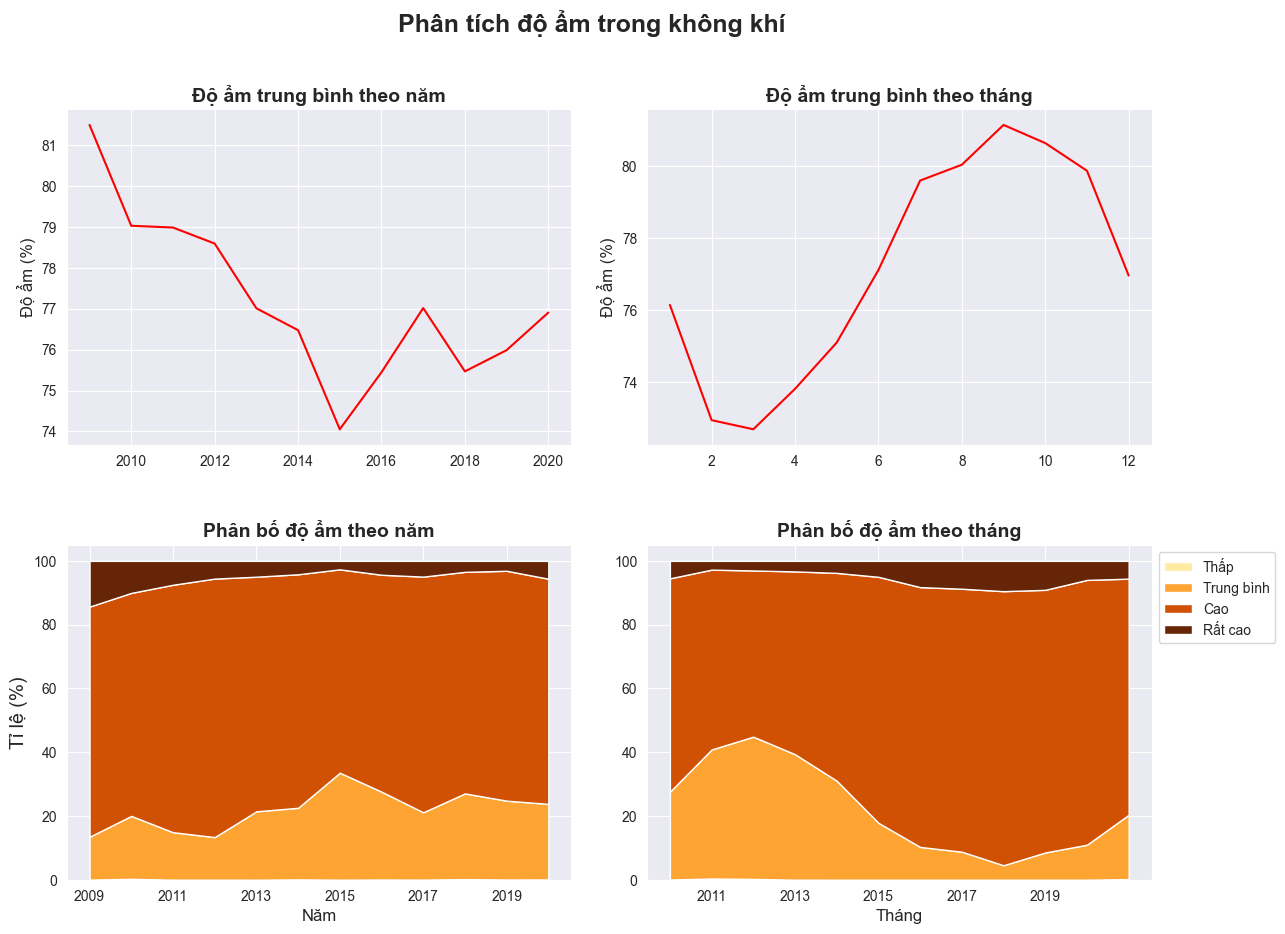

In [170]:
# Set figure size and spacing
fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'hspace': 0.3, 'wspace': 0.15})
sns.set_style("whitegrid")

# Plot average humidity per year
data = df.groupby(by=['year'])[['humidi']].mean().reset_index()
data.columns = ['year', 'humidi']

sns.lineplot(
    data=data, x='year', y='humidi', ax=axes[0, 0], color='red'
)
axes[0, 0].set_title('Độ ẩm trung bình theo năm', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Độ ẩm (%)', fontsize=12)
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(labelsize=10)
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)

# Plot average humidity per month
data = df.groupby(by=['month'])[['humidi']].mean().reset_index()
data.columns = ['month', 'humidi']

sns.lineplot(
    data=data, x='month', y='humidi', ax=axes[0, 1], color='red'
)
axes[0, 1].set_title('Độ ẩm trung bình theo tháng', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Độ ẩm (%)', fontsize=12)
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(labelsize=10)
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)

# Plot stacked chart of humidity bins per year
theme = plt.get_cmap('YlOrBr')
axes[1, 0].set_prop_cycle('color', theme(np.linspace(0.2, 1, 4)).tolist())

data = stacking(df, 'year', 'humidi_bin')
axes[1, 0].stackplot(data.index, data.iloc[:, [2, 3, 0, 1]].values.transpose())

axes[1, 0].set_title('Phân bố độ ẩm theo năm', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Tỉ lệ (%)', fontsize=14)
axes[1, 0].set_xlabel('Năm', fontsize=12)
axes[1, 0].set_xticks(range(2009, 2021, 2))
axes[1, 0].set_xticklabels(range(2009, 2021, 2), fontsize=10)

# Plot stacked chart of humidity bins per month
theme = plt.get_cmap('YlOrBr')
axes[1, 1].set_prop_cycle('color', theme(np.linspace(0.2, 1, 4)).tolist())

data = stacking(df, 'month', 'humidi_bin')
axes[1, 1].stackplot(data.index, data.iloc[:, [2, 3, 0, 1]].values.transpose())

axes[1, 1].set_title('Phân bố độ ẩm theo tháng', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Tháng', fontsize=12)
axes[1, 1].set_xticklabels(range(2009, 2021, 2), fontsize=10);
axes[1, 1].legend([readable_mapper[i] for i in humidi_order], loc = 'upper left', bbox_to_anchor = (1, 1))

fig.suptitle('Phân tích độ ẩm trong không khí', fontsize=18, fontweight='bold')



* Độ ẩm trung bình năm cao nhất vào năm 2010, liên tục giảm cho tới năm 2015 sau đó nhìn chung có xu hướng tăng tới năm 2020.
* Độ ẩm trung bình theo tháng có quy luật tăng giảm khá giống với lượng mưa trung bình theo tháng.
* Có rất ít ngày ghi nhận độ ẩm ở mức thấp, không đáng kể

### Các cột `wind` (tốc độ gió), `cloud` (độ che phủ mây) và `pressure` (áp suất mực nước biển) theo tháng

(0.0, 100.0)

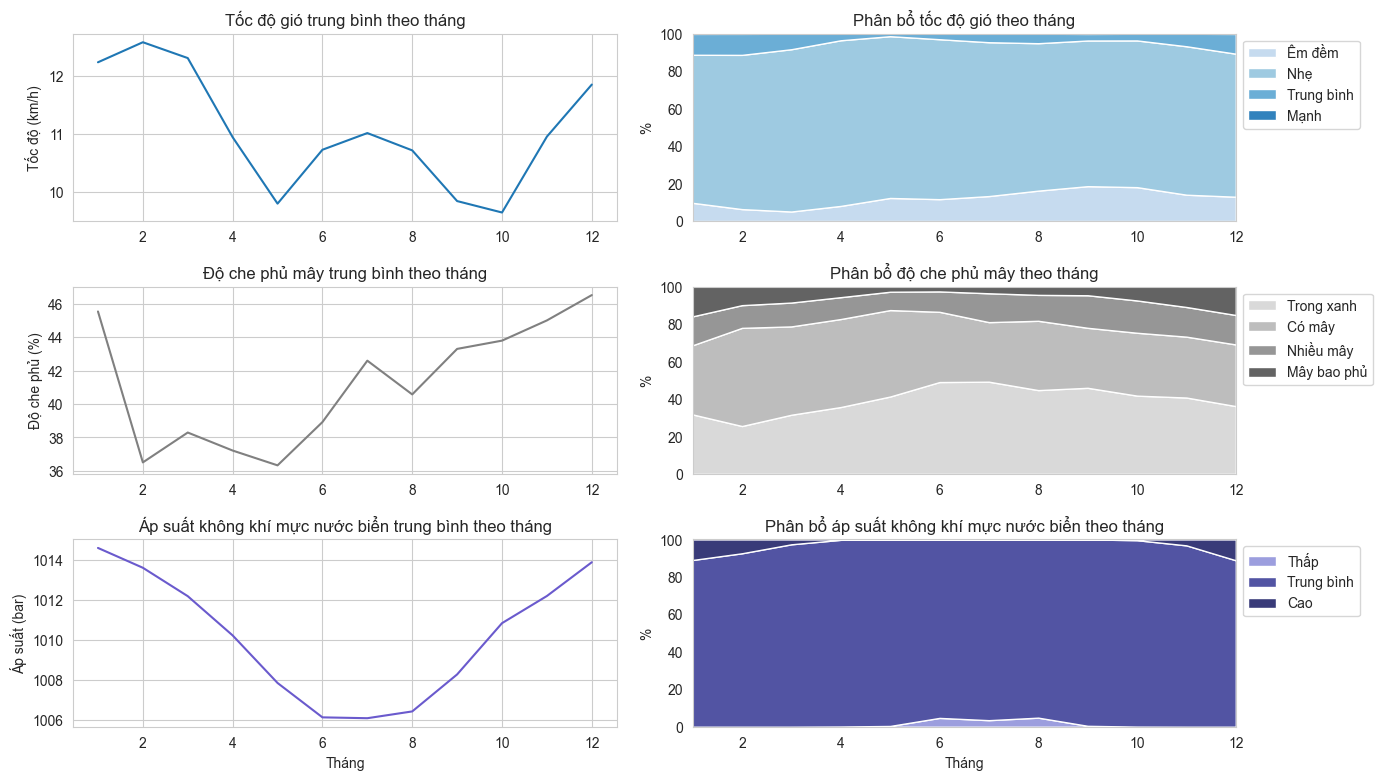

In [171]:
fig, axes = plt.subplots(3, 2, figsize = (15, 9))
fig.subplots_adjust(hspace = 0.35, wspace = 0.14)

#wind
data = df.groupby(by = ['month'])[['wind']].mean().reset_index()
data.columns = ['month', 'wind']

sns.lineplot(
    data = data, x = 'month', y = 'wind', ax = axes[0, 0],
)

theme = plt.get_cmap('tab20c')
axes[0, 1].set_prop_cycle('color', theme(np.linspace(0.19, 0, 4)).tolist())

data = stacking(df, 'month', 'wind_bin')
axes[0, 1].stackplot(data.index, data.iloc[:, [0, 2, 3, 1]].values.transpose())
axes[0, 1].legend([readable_mapper[i] for i in wind_order], loc = 'upper left', bbox_to_anchor = (1, 1))

#cloud
data = df.groupby(by = ['month'])[['cloud']].mean().reset_index()
data.columns = ['month', 'cloud']

sns.lineplot(
    data = data, x = 'month', y = 'cloud', ax = axes[1, 0], color = 'gray'
)

theme = plt.get_cmap('tab20c')
axes[1, 1].set_prop_cycle('color', theme(np.linspace(1, 0.8, 4)).tolist())

data = stacking(df, 'month', 'cloud_bin')
axes[1, 1].stackplot(data.index, data.iloc[:, [1, 3, 2, 0]].values.transpose())
axes[1, 1].legend([readable_mapper[i] for i in cloud_order], loc = 'upper left', bbox_to_anchor = (1, 1))

#pressure
data = df.groupby(by = ['month'])[['pressure']].mean().reset_index()
data.columns = ['month', 'pressure']

sns.lineplot(
    data = data, x = 'month', y = 'pressure', ax = axes[2, 0], color = 'slateblue'
)

theme = plt.get_cmap('tab20b')
axes[2, 1].set_prop_cycle('color', theme(np.linspace(0.19, 0, 3)).tolist())

data = stacking(df, 'month', 'pressure_bin')
axes[2, 1].stackplot(data.index, data.iloc[:, [1, 2, 0]].values.transpose())
axes[2, 1].legend([readable_mapper[i] for i in pressure_order], loc = 'upper left', bbox_to_anchor = (1, 1))

#title, lable, legend
axes[0, 0].set_title('Tốc độ gió trung bình theo tháng')
axes[1, 0].set_title('Độ che phủ mây trung bình theo tháng')
axes[2, 0].set_title('Áp suất không khí mực nước biển trung bình theo tháng')
axes[0, 1].set_title('Phân bổ tốc độ gió theo tháng')
axes[1, 1].set_title('Phân bổ độ che phủ mây theo tháng')
axes[2, 1].set_title('Phân bổ áp suất không khí mực nước biển theo tháng')

axes[0, 0].set_ylabel('Tốc độ (km/h)')
axes[1, 0].set_ylabel('Độ che phủ (%)')
axes[2, 0].set_ylabel('Áp suất (bar)')
axes[0, 1].set_ylabel('%')
axes[1, 1].set_ylabel('%')
axes[2, 1].set_ylabel('%')

axes[0, 0].set_xlabel('')
axes[0, 1].set_xlabel('')
axes[1, 0].set_xlabel('')
axes[1, 1].set_xlabel('')
axes[2, 0].set_xlabel('Tháng')
axes[2, 1].set_xlabel('Tháng')

axes[0, 1].set_xlim(1, 12)
axes[0, 1].set_ylim(0, 100)
axes[1, 1].set_xlim(1, 12)
axes[1, 1].set_ylim(0, 100)
axes[2, 1].set_xlim(1, 12)
axes[2, 1].set_ylim(0, 100)

* Tốc độ gió: Đa số thời gian trong năm gió ở mức nhẹ, tốc độ trung bình từ 10 - 11 km/h, khoảng từ tháng 12 tới tháng 3 năm sau ghi nhận nhiều ngày có gió ở mức trung bình hơn, tốc độ trung bình 12 km/h

* Độ che phủ mây: thấp trong khoảng tháng 3 - 7 (trung bình từ 42% trở xuống), ghi nhận nhiều ngày trong xanh và có mây. Khoàng từ tháng 8 tới tháng 1 năm sau ghi nhận số ngày nhiều mây và mây bao phủ tăng lên, độ che phủ trung bình tăng lên trên 42%, tối đa 46%

* Áp suất mực nước biển: thấp nhất vòng khoảng tháng 6, 7, 8 (ghi nhận những điểm ở mức thấp) vào cao nhất vào các tháng 11, 12, 1 (ghi nhận những điểm ở mức cao)